In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv("../input/train.csv")
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## To find where missing values are

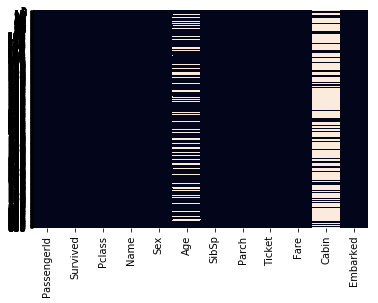

In [4]:
sns.heatmap(train.isnull(), yticklabels = True, cbar = False)

## So age and cabins these two features have got null values

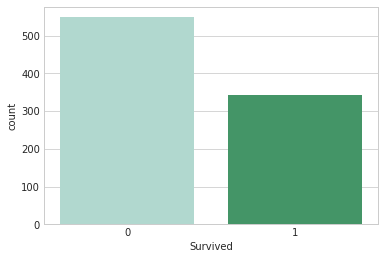

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train, palette = 'BuGn')

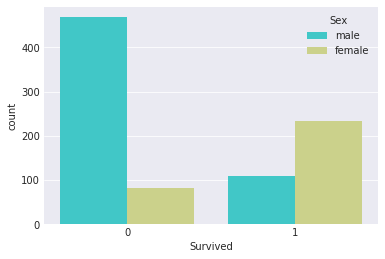

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='rainbow')

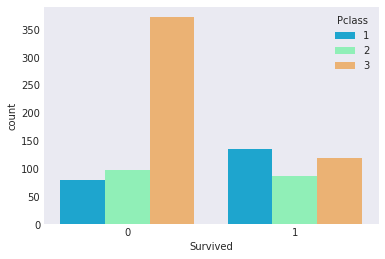

In [7]:
sns.set_style('dark')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

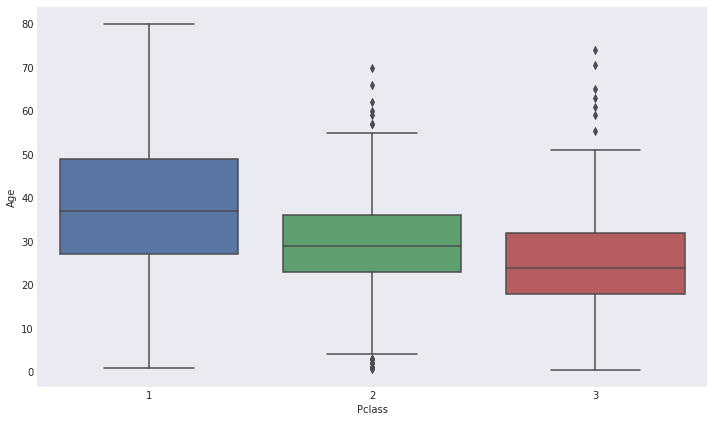

In [8]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y = 'Age', data=train,palette='deep')

## Replace null values of Age with this mean values of age with respect their Pclasses 

In [9]:
def mean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
            

In [10]:
train['Age'] = train[['Age','Pclass']].apply(mean_age, axis=1)

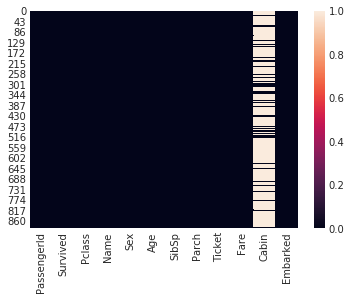

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.drop('Cabin', axis =1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting categorical values

In [13]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [14]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [15]:
train = pd.concat([train,sex,embark], axis=1)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Train Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=100)

## Training and predicting

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
prediction = logmodel.predict(X_test)

## Evaluation 

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       159
          1       0.80      0.64      0.71       109

avg / total       0.79      0.79      0.78       268

